<h2>Import libraries</h2>

In [9]:
import random

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

<h2>Load dataset</h2>

In [10]:
df = pd.read_csv('data.csv')

In [11]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<h2>Data preprocessing</h2>

In [12]:
df.shape

(303, 14)

Let's for missing values in the dataset.

In [13]:
df.isna().any().any()

False

<h2>Exploratory Data Analysis</h2>

Let's see how the values within each feature and target are distributed.

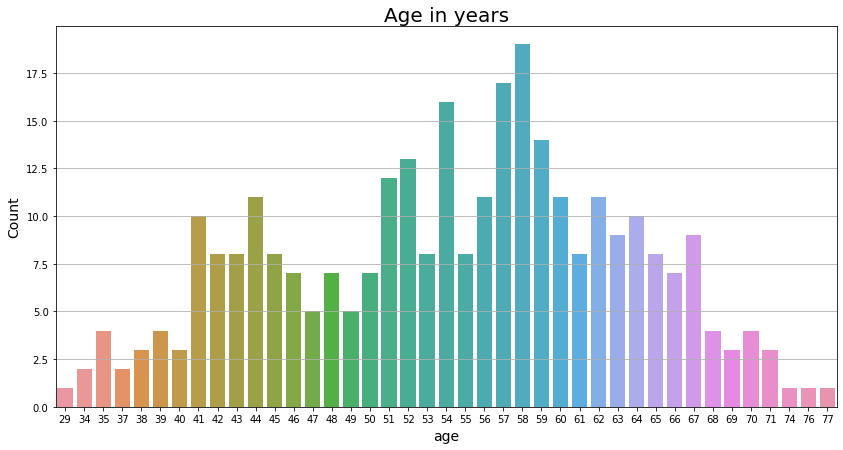

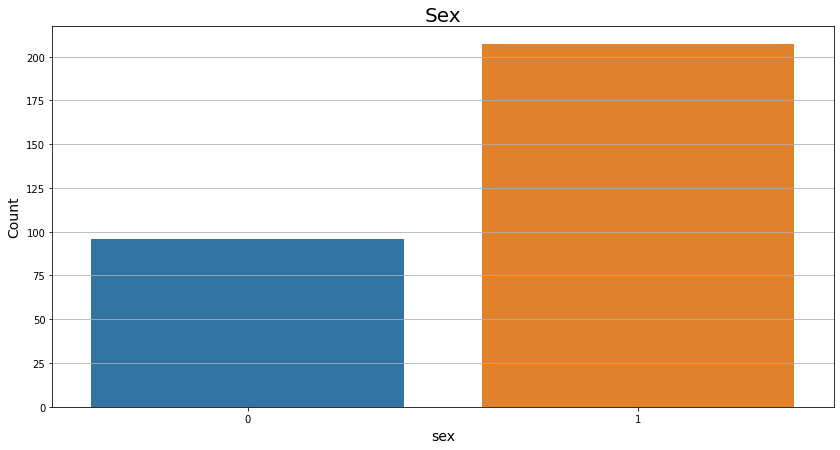

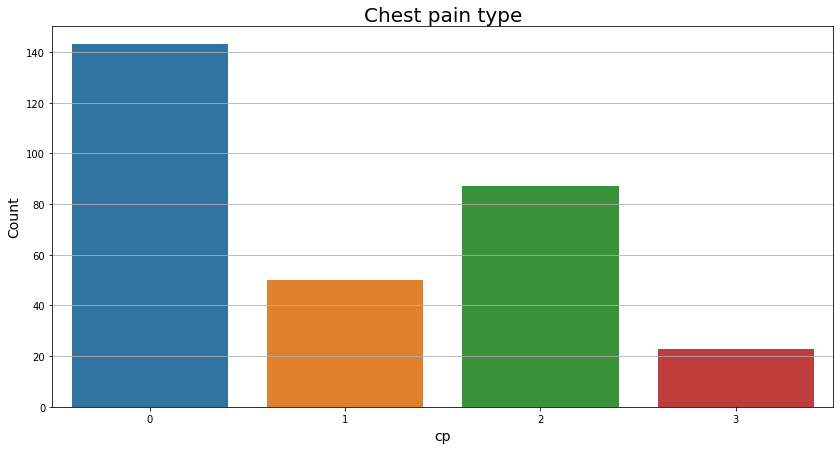

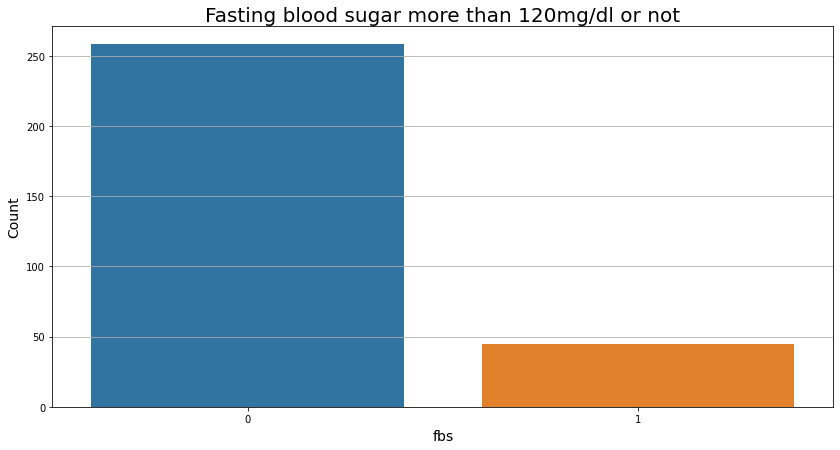

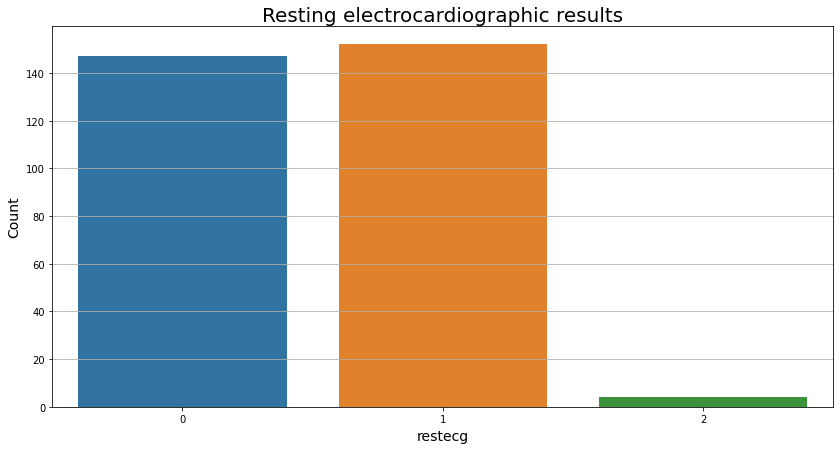

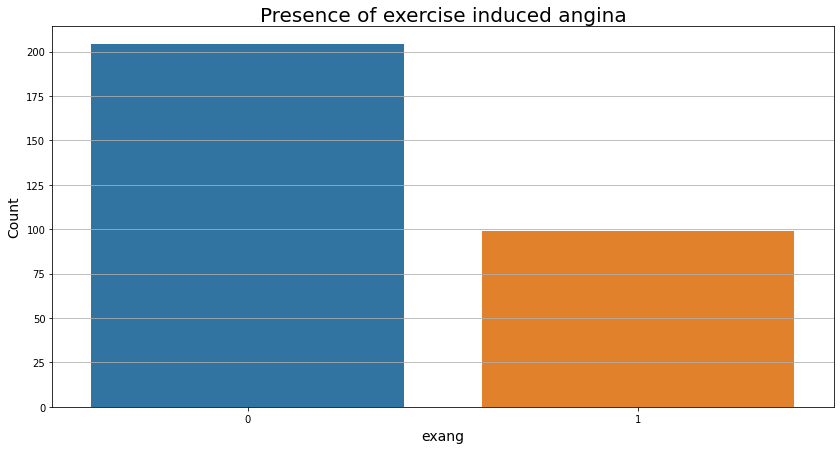

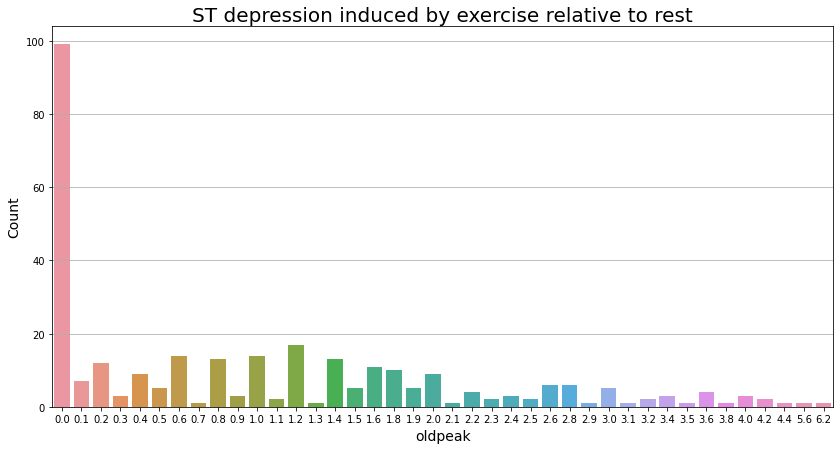

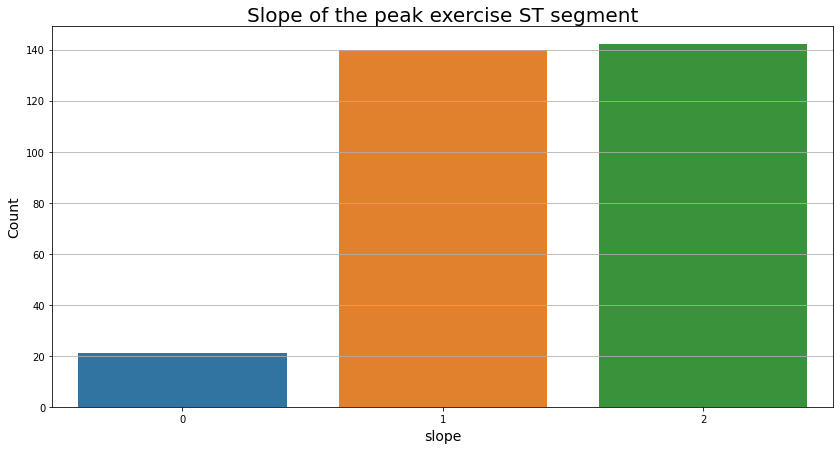

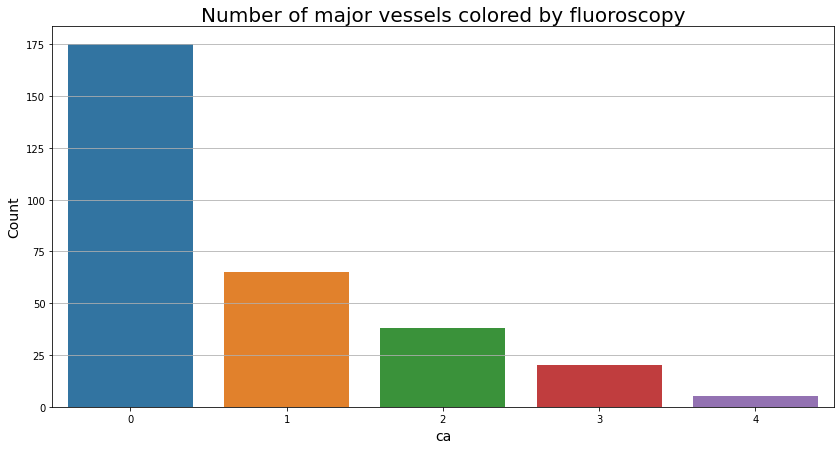

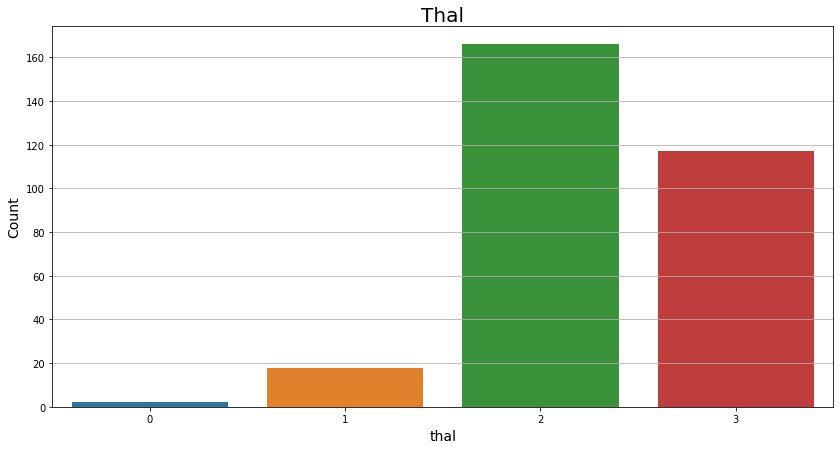

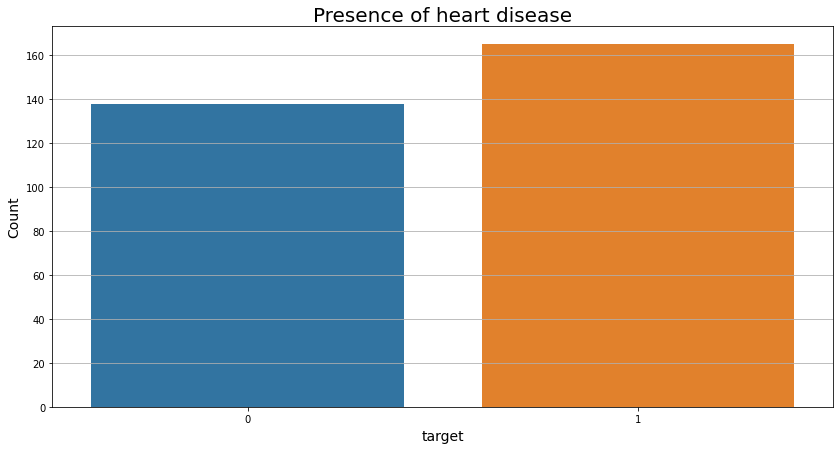

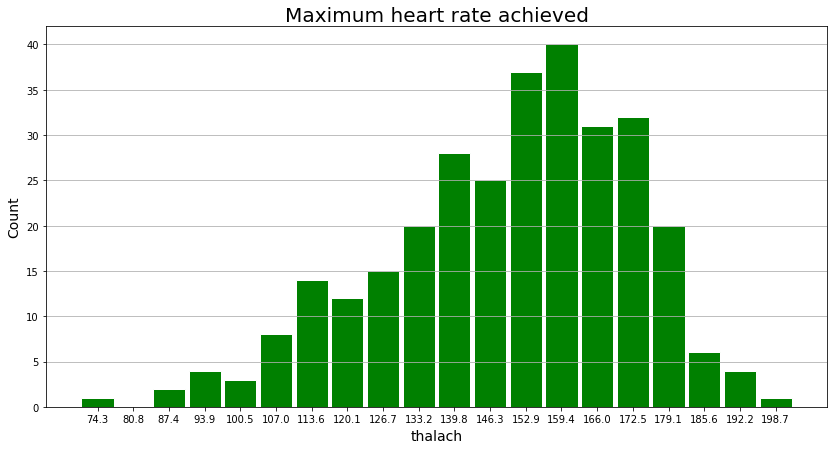

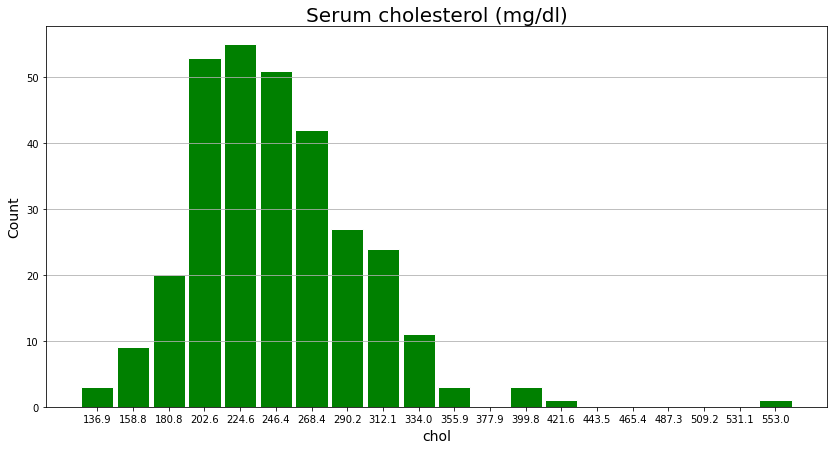

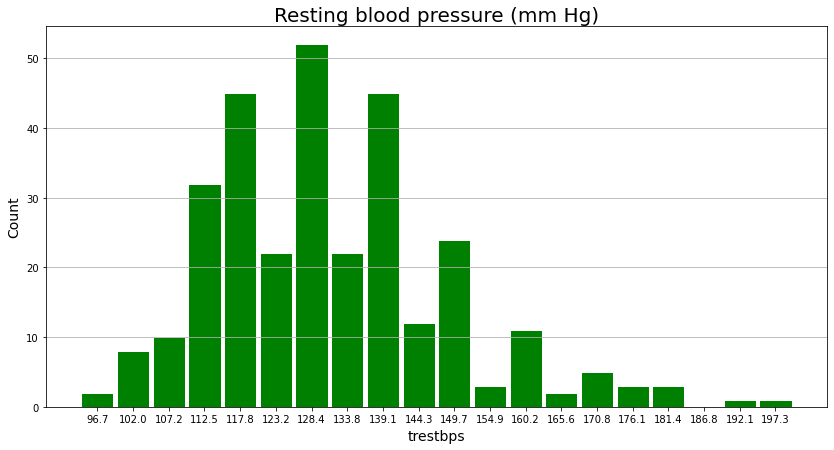

In [14]:
feature_columns = df.drop(columns=['thalach', 'chol', 'trestbps']).columns

titles =    {'age': 'Age in years',
            'sex': 'Sex',
            'cp': 'Chest pain type',
            'trestbps': 'Resting blood pressure (mm Hg)',
            'chol': 'Serum cholesterol (mg/dl)',
            'fbs': 'Fasting blood sugar more than 120mg/dl or not',
            'restecg': 'Resting electrocardiographic results',
            'thalach': 'Maximum heart rate achieved',
            'exang': 'Presence of exercise induced angina',
            'oldpeak': 'ST depression induced by exercise relative to rest',
            'slope': 'Slope of the peak exercise ST segment',
            'ca': 'Number of major vessels colored by fluoroscopy',
            'thal': 'Thal',
            'target': 'Presence of heart disease'}

for column in feature_columns:
    plt.figure(figsize=(14, 7))
    ax = sns.countplot(x=column, data=df)
    
    ax.set_title(titles[column], pad=5, fontsize=20)
    ax.set_ylabel('Count', labelpad=5, fontsize=14)
    ax.set_xlabel(column, labelpad=5, fontsize=14)

    ax.grid(axis='y') 

    plt.show()

# 'thalach', 'chol' and 'trestbps' will be plotted as histogram so that more useful
# information can be seen

bins = 20

for column in ['thalach', 'chol', 'trestbps']:
    plt.figure(figsize=(14, 7))
    plt.hist(df[column], bins=bins, color='green', edgecolor='white', rwidth=0.9)
    plt.title(titles[column], pad=5, fontsize=20)
    plt.xlabel(column, labelpad=5, fontsize=14)
    plt.ylabel('Count', labelpad=5, fontsize=14)

    interval = (df[column].max() - df[column].min()) / bins
    plt.xticks([df[column].min() + interval * (i+0.5) for i in range(bins)])

    plt.grid(axis='y')

    plt.show()


Let's also see the corrlation between features in the dataset. There is also a good balance of both categories in the 'target'.

<AxesSubplot:>

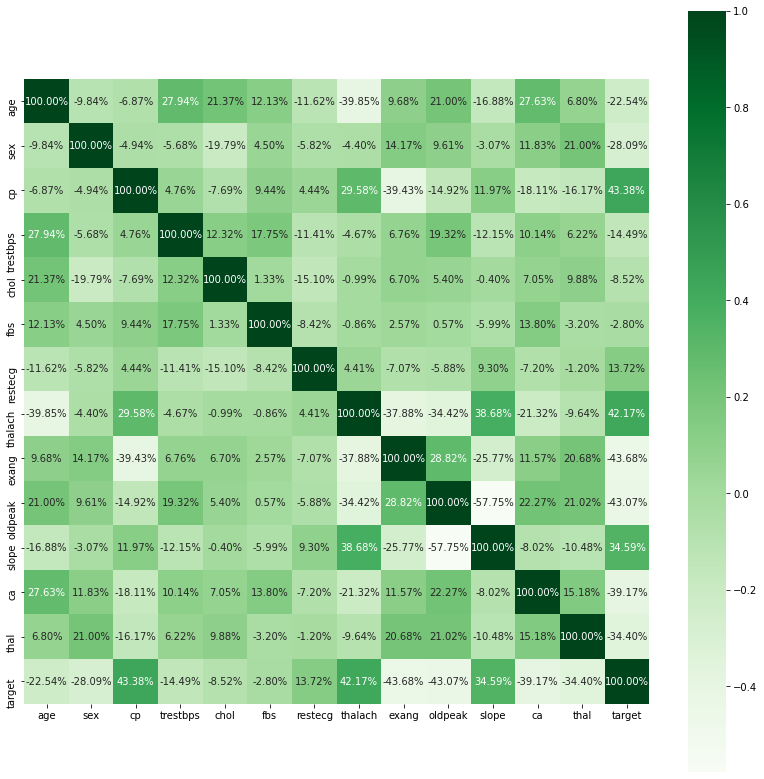

In [15]:
corr = df.corr()

plt.figure(figsize=(14, 14))

sns.heatmap(corr, annot=True, fmt='.2%', cbar=True, linecolor='w', cmap='Greens',
            square=True)

There doesn't seem to be any good correlation between the features and the target.

<h2>Modelling</h2>

In [16]:
X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=4,
                                                    stratify=y)

In [17]:
model = RandomForestClassifier(n_estimators=400, random_state=5)

model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=400, random_state=5)

<h2>Evaluation</h2>

In [18]:
# Model score for train and test dataset
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

1.0
0.8688524590163934


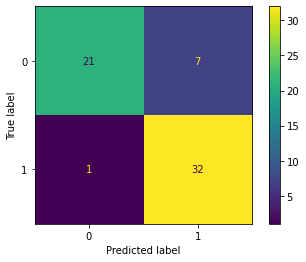

In [19]:
# Confusion matrix for test dataset
plot_confusion_matrix(model, X_test, y_test)